In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
pcd = o3d.io.read_point_cloud('../data/small_city_road_down_test/sparse/sparse.ply')

In [4]:
recon_points = np.asarray(pcd.points)

In [2]:
g_model = torch.load("../results/small_city_road_down_test/epochs_200_000/ckpts/ckpt_199999_rank0.pt", map_location="cpu", weights_only=True)

In [3]:
g_model.keys()

dict_keys(['step', 'splats'])

In [4]:
g_model['splats'].keys()

odict_keys(['means', 'opacities', 'quats', 'scales', 'sh0', 'shN'])

In [8]:
g_model['splats']['means'].flatten()

tensor([ 1.7499,  0.2593, -0.0659,  ..., -7.3003,  6.4496, -1.2010])

(array([1.0000e+00, 7.0000e+00, 3.0700e+02, 2.4200e+02, 2.0000e+03,
        7.9515e+04, 2.1989e+04, 2.6700e+02, 1.7000e+01, 1.0000e+00]),
 array([-97.52009583, -80.56412506, -63.60815048, -46.6521759 ,
        -29.69620514, -12.74023438,   4.21574402,  21.17171478,
         38.12768555,  55.08366394,  72.03962708]),
 <BarContainer object of 10 artists>)

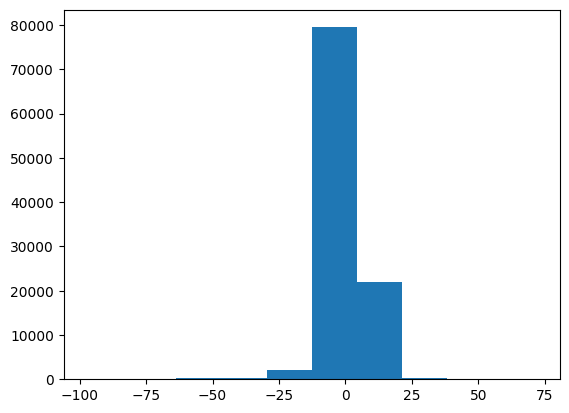

In [5]:
plt.hist(g_model['splats']['means'].flatten())
# plt.hist(recon_points.flatten())

In [6]:
torch.min(g_model['splats']['means'].flatten()), torch.max(g_model['splats']['means'].flatten()) 

(tensor(-97.5201), tensor(72.0396))

In [7]:
torch.min(g_model['splats']['scales'].flatten()), torch.max(g_model['splats']['scales'].flatten()) 

(tensor(-21.0177), tensor(6.3537))

(array([2.6400e+02, 1.0570e+03, 2.0180e+03, 1.9770e+03, 2.5240e+03,
        1.0559e+04, 6.0256e+04, 2.5323e+04, 3.6400e+02, 4.0000e+00]),
 array([-21.01771927, -18.2805748 , -15.54343128, -12.80628777,
        -10.0691433 ,  -7.33199883,  -4.59485626,  -1.85771179,
          0.87943268,   3.61657715,   6.35372019]),
 <BarContainer object of 10 artists>)

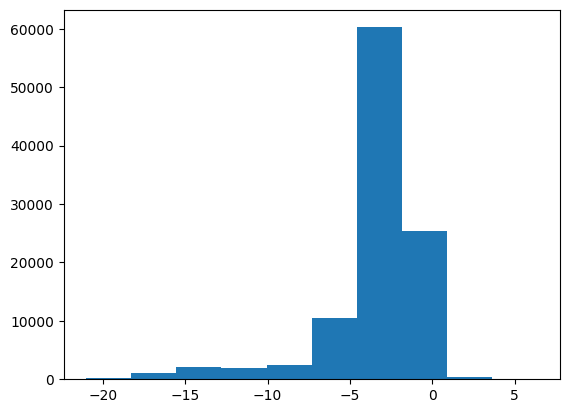

In [8]:
plt.hist(g_model['splats']['scales'].flatten())

In [11]:
np.min(recon_points.flatten()), np.max(recon_points.flatten())

(np.float64(-57.36613464355469), np.float64(100.2752914428711))

In [9]:
south_building_model = torch.load("../results/south-building/ckpts/ckpt_29999_rank0.pt", map_location="cpu", weights_only=True)

(array([2.17000e+02, 7.75500e+03, 8.84440e+04, 3.52712e+05, 5.20376e+05,
        5.30065e+05, 6.83705e+05, 5.26486e+05, 1.28450e+04, 1.26000e+02]),
 array([-19.66589928, -17.66911125, -15.67232418, -13.67553711,
        -11.67874908,  -9.68196201,  -7.68517494,  -5.68838692,
         -3.69159985,  -1.69481277,   0.30197534]),
 <BarContainer object of 10 artists>)

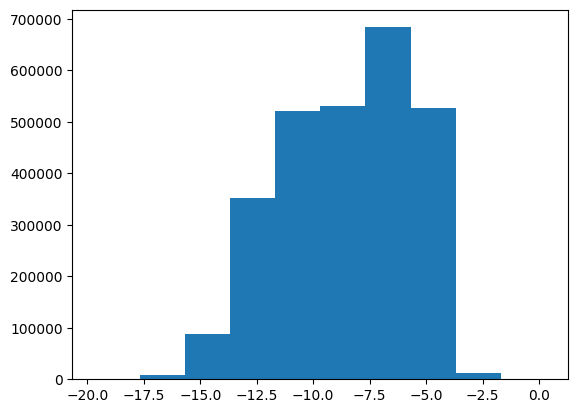

In [10]:
plt.hist(south_building_model['splats']['scales'].flatten())

In [13]:
vals = g_model['splats']['means'].numpy()

In [ ]:
gs_cloud = o3d.geometry.PointCloud()
gs_cloud.points = o3d.utility.Vector3dVector(vals[:10])

In [ ]:
o3d.io.write_point_cloud("../results/small_city_road_down_test/epochs_200_000/gs_cloud.ply")

In [11]:
g_model['splats']['opacities']

tensor([ 9.8525, -2.4535,  4.1824,  ...,  7.4497, -1.4076,  0.6057])

In [26]:
g_model['splats']['quats']

tensor([[ 0.7937,  1.3063,  0.4167,  0.6678],
        [ 0.4722,  0.4163,  0.7054,  0.7284],
        [ 0.9930, -0.2705,  1.1304,  0.2532],
        ...,
        [ 0.4946,  0.4205,  0.4069,  0.9306],
        [ 0.9267,  0.3006,  0.8210, -0.2653],
        [ 0.1505,  0.0690,  0.8159,  1.1015]], device='cuda:0')

In [27]:
g_model['splats']['scales']

tensor([[ -3.6522,  -4.6172,  -1.9193],
        [ -8.6422,  -5.9295,  -6.1137],
        [ -4.6559,  -7.0252,  -7.0234],
        ...,
        [ -3.8326,  -6.9958,  -6.8600],
        [ -3.9805,  -5.6362, -11.0361],
        [ -3.4751,  -6.4578,  -6.3590]], device='cuda:0')

In [32]:
SH_C0 = 0.28209479177387814

In [35]:
colors = g_model['splats']['sh0'] * SH_C0 + 0.5
colors[colors < 0] = 0

In [36]:
colors

tensor([[[0.9617, 0.9669, 0.9642]],

        [[0.6185, 0.4609, 0.4227]],

        [[0.3137, 0.2310, 0.2082]],

        ...,

        [[0.5990, 0.6605, 0.6088]],

        [[0.0000, 0.0153, 0.0000]],

        [[0.5436, 0.4936, 0.5111]]], device='cuda:0')

(array([7.96044e+05, 8.56371e+05, 8.87542e+05, 1.66934e+05, 1.34950e+04,
        1.80700e+03, 3.65000e+02, 1.37000e+02, 2.70000e+01, 9.00000e+00]),
 array([0.        , 0.31576023, 0.63152045, 0.94728065, 1.2630409 ,
        1.57880116, 1.89456129, 2.21032166, 2.5260818 , 2.84184194,
        3.15760231]),
 <BarContainer object of 10 artists>)

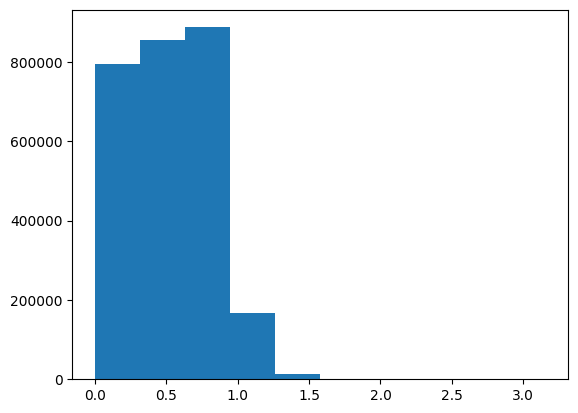

In [38]:
plt.hist(colors.cpu().numpy().flatten())

In [28]:
g_model['splats']['sh0'].shape

torch.Size([907577, 1, 3])

In [30]:
g_model['splats']['shN'].shape

torch.Size([907577, 15, 3])

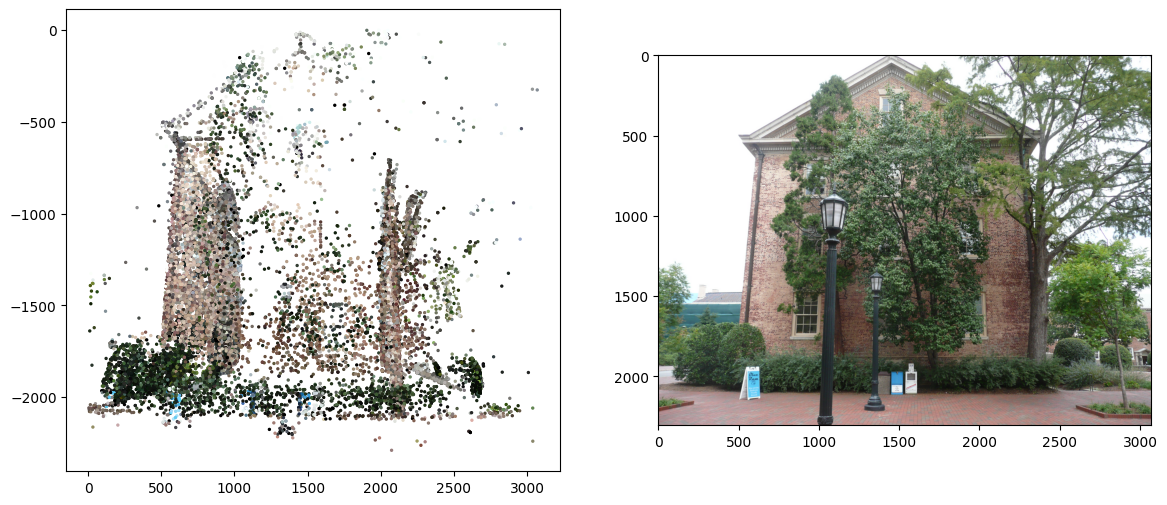

In [12]:
from matplotlib import image as mpimg
from pathlib import Path
from src.geometry.point_transformation import *

scene_folder = Path('../data/south-building')
images_folder = scene_folder / 'images'
database_path = scene_folder / 'database.db'
output_path = scene_folder / 'undistorted_images'

reconstruction = pycolmap.Reconstruction(output_path / 'sparse')

img_id = 10
img = reconstruction.images[img_id]
cam_id = 1

extrinsic_matrix = get_extrinsic_params(img.cam_from_world)
f, cx, cy = reconstruction.cameras[cam_id].params
width, height = reconstruction.cameras[cam_id].width, reconstruction.cameras[cam_id].height
znear, zfar = 1, 5
intrinsic_matrix = get_intrinsic_opengl_params(f, f, height, width, zfar=zfar, znear=znear)

colors = np.array([p.color for p in reconstruction.points3D.values()]) / 255.0
homogeneous_points = convert_to_homogenous(get_points_xyz(reconstruction))
camera_coordinates = homogeneous_points @ extrinsic_matrix.T
clip_coordinates = camera_coordinates @ intrinsic_matrix.T
point_ids = cull_coordinates_ids(clip_coordinates, camera_coordinates, zfar=zfar, znear=znear)

ndc_coordinates = to_ndc_coordinates(clip_coordinates[point_ids])
c = colors[point_ids]

screen_coordinates = to_screen_coordinates(ndc_coordinates, width, height, zfar, znear)
image = mpimg.imread(images_folder / f'{img.name}')
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(screen_coordinates[:, 0], -screen_coordinates[:, 1], s=2, c=c)
plt.subplot(1, 2, 2)
plt.imshow(image)